In [1]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
food_labels =  {
    0: 'chicken',
    1: 'pizza',
    2: 'burger',
    3: 'pork_cutlet',
    4: 'sandwich',
    5: 'sushi',
    6: 'salad',
    7: 'pork feet',
    8: 'juck',
    9: 'bossam',
    10: 'gimbab',
    11: 'dduckbokki',
    12: 'Jajangmyeon',
    13: 'Jjambbong',
    14: 'Sweet and sour pork',
}

In [3]:
store_category = {
    '치킨' : ['chicken'],
    '피자/양식' : ['pizza'],
    '프랜차이즈' : ['burger'],
    '중국집' : ['Jajangmyeon', 'Jjambbong', 'Sweet and sour pork'],
    '한식' : ['juck'],
    '분식' : ['gimbab', 'dduckbokki'],
    '분식' : ['pork_cutlet', 'sushi'],
    '카페/디저트' : ['salad', 'sandwich'],
    '족발/보쌈' : ['pork feet', 'bossam']
}

In [4]:
mymodel = YOLO('../Data_total/fit_logs/yolov8_fit_e100_v3/weights/best.pt')
mymodel.to('cuda')

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

## test img 

In [5]:
test_img = '../Data_some(test)/test_sample/test2.jpg'

results = mymodel.predict(test_img)


image 1/1 C:\Users\3sp39\Documents\DL_project\Code\..\Data_some(test)\test_sample\test2.jpg: 576x1024 1 pork feet, 1 Jajangmyeon, 118.2ms
Speed: 10.9ms preprocess, 118.2ms inference, 45.2ms postprocess per image at shape (1, 3, 576, 1024)


In [6]:
results[0]

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'chicken', 1: 'pizza', 2: 'burger', 3: 'pork_cutlet', 4: 'sandwich', 5: 'sushi', 6: 'salad', 7: 'pork feet', 8: 'juck', 9: 'bossam', 10: 'gimbab', 11: 'dduckbokki', 12: 'Jajangmyeon', 13: 'Jjambbong', 14: 'Sweet and sour pork'}
orig_img: array([[[251, 255, 255],
        [251, 255, 255],
        [253, 255, 255],
        ...,
        [226, 225, 221],
        [225, 224, 220],
        [223, 221, 220]],

       [[251, 255, 255],
        [251, 255, 255],
        [253, 255, 255],
        ...,
        [229, 228, 224],
        [228, 227, 223],
        [224, 222, 221]],

       [[251, 255, 255],
        [251, 255, 255],
        [253, 255, 255],
        ...,
        [230, 229, 225],
        [229, 228, 224],
        [225, 223, 222]],

       ...,

       [[113, 118, 116],
        [114, 119, 117],
        [115, 120, 118],
        ...,
        [212, 208, 2

In [7]:
result_labels = [int(n) for n in results[0].boxes.cls.cpu().numpy()]
result_labels = [food_name for label in result_labels for food_lab, food_name in food_labels.items() if label == food_lab]

result_labels

['Jajangmyeon', 'pork feet']

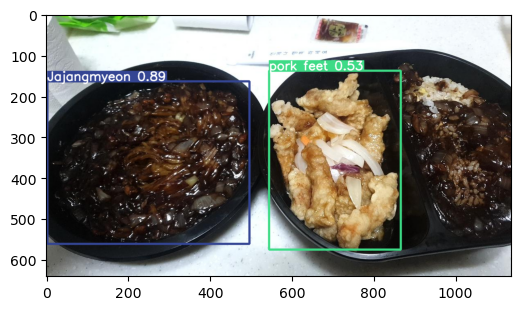

In [8]:
plots = results[0].plot()
plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(plots, cv2.COLOR_BGR2RGB))
plt.show();

In [9]:
def Judge_review(review_foler_dir, model, food_labels,store_category):
    import os
    from glob import glob
    
    pred_reviewer = []
    reveiw_list = os.listdir(review_foler_dir)
    
    for idx, review in enumerate(reveiw_list):

        cate = review.split('re')[0]
        imgs = glob(review_foler_dir+review+'/img*')

        labels = []
        for img in imgs:
            results = model.predict(img, verbose=False)
            result_labels = [int(n) for n in results[0].boxes.cls.cpu().numpy()]
            result_labels = [food_name for label in result_labels for food_lab, food_name in food_labels.items() if label == food_lab]
            labels.extend(result_labels) 
            
        tmp_list = []
        for label in labels:
            if label in store_category[cate]:
                tmp_list.append(1)
                break
            else:
                tmp_list.append(0)
             
        if sum(tmp_list)==0:
            pred_reviewer.append(0)
        else:
            pred_reviewer.append(1)

    return pred_reviewer
        

In [10]:
review_foler = '../Data_some(test)/reviews_data/'

pred = Judge_review(review_foler_dir=review_foler, 
                    model=mymodel, 
                    food_labels=food_labels,
                    store_category=store_category
                   )

In [11]:
pred

[0, 1, 0, 0, 1, 1, 1, 1, 0, 1]